In [18]:
import pandas as pd
df1 = pd.read_csv("Data/03_store_product.csv")
df1

,공급일자,물품코드,물품대분류,물품중분류,물품소분류,물품명,구매수량,구매금액,구매매장,반품_원거래일자,회원번호
0,20220201,50142001,채소,잎/줄기채소,시금치,시금치(300g),1.0,2000,매장3,NaN,2101.0
1,20220201,60302012,축산물,육가공,돈가스/분쇄가공,튀김옷돈가스(400g),1.0,6300,매장3,NaN,2101.0
2,20220201,80301002,간식,밀가공,라면,감자라면(110g:1봉),2.0,2600,매장3,NaN,2101.0
3,20220201,80301010,간식,밀가공,라면,사리면(100g),1.0,900,매장3,NaN,2101.0
4,20220201,80305003,간식,밀가공,만두,고기만두(500g),1.0,5400,매장3,NaN,2101.0
...,...,...,...,...,...,...,...,...,...,...,...
735778,20220630,100201003,반찬,두부/유부,두부,두부(1모:420g),1.0,2200,매장3,NaN,2637.0
735779,20220630,100306006,반찬,즉석조리,간편요리,현미쌀가스(320g),1.0,5830,매장3,NaN,2637.0
735780,20220630,130214027,생활용품,생활용품,기타생활용품,모기기피제(로즈마리향),1.0,8470,매장3,NaN,2637.0
735781,20220630,130501098,생활용품,화장품,기초화장품,수피아 알로에베라잎즙 수딩젤,1.0,7370,매장3,NaN,2637.0


In [12]:
df2 = pd.read_csv("Data/03_store_member.csv")
df2

,회원번호,회원상태,성별,결혼유무,주소,연령
0,2101,정상회원,여,기혼,서울 강북구 미아동 134-,51
1,2102,정상회원,여,NaN,경기 용인시 수지구 동천동,71
2,2103,정상회원,여,기혼,경기 용인시 수지구 동천동,46
3,2104,정상회원,여,NaN,경기 용인시 수지구 성복동,49
4,2105,정상회원,여,기혼,경기 용인시 수지구 동천동,70
...,...,...,...,...,...,...
4391,6492,정상회원,여,미혼,경기 성남시 분당구 판교동,55
4392,6493,정상회원,여,기혼,서울 관악구 행운동 1681,36
4393,6494,정상회원,남,기혼,경기 성남시 분당구 백현동,43
4394,6495,정상회원,여,기혼,서울 용산구 한남동 737-,57


In [38]:
df3 = pd.read_csv("Data/03_Merge_Data.csv")
df3

,Unnamed: 0,회원번호,회원상태,성별,결혼유무,주소,연령,총구매금액,총구매수량,총방문횟수
0,0,2101,정상회원,여,기혼,서울 강북구 미아동 134-,51,1991230,382.0,86
1,1,2102,정상회원,여,NaN,경기 용인시 수지구 동천동,71,2095860,472.5,79
2,2,2103,정상회원,여,기혼,경기 용인시 수지구 동천동,46,8273550,1675.4,126
3,3,2104,정상회원,여,NaN,경기 용인시 수지구 성복동,49,6289495,1401.8,125
4,4,2105,정상회원,여,기혼,경기 용인시 수지구 동천동,70,3067930,602.0,57
...,...,...,...,...,...,...,...,...,...,...
4280,4280,6492,정상회원,여,미혼,경기 성남시 분당구 판교동,55,51550,10.0,1
4281,4281,6493,정상회원,여,기혼,서울 관악구 행운동 1681,36,22500,3.0,1
4282,4282,6494,정상회원,남,기혼,경기 성남시 분당구 백현동,43,18500,3.0,1
4283,4283,6495,정상회원,여,기혼,서울 용산구 한남동 737-,57,5300,1.0,1


# 소매점 판매 데이터의 고객 분석

1. **VIP 고객 명단 추출 및 저장**
    - **목표:** `df2` 데이터를 활용하여 '총구매금액'이 높은 상위 100명의 고객 명단을 추출
    - **출력:** 추출된 결과를 `result_member_vip.xlsx` 파일로 저장

In [8]:
import warnings
warnings.filterwarnings('ignore')

In [20]:
df = df3.sort_values("총구매금액", ascending = False).head(100)
df.to_excel("result_member_vip.xlsx", index = False)

2. **성별에 따른 총구매금액 합계 비교**
    - **목표:** 회원별 '성별'에 따라 '총구매금액'의 합계를 계산하여 Table 형식으로 작성
    - **참고:** Pandas의 GroupBy 기능을 활용

In [76]:
df3.groupby("성별")['총구매금액'].sum().reset_index()

,성별,총구매금액
0,남,250926387
1,여,3925957601


3. **기혼 고객 중 방문횟수 상위 고객 확인**
    - **목표:** '결혼유무'가 '기혼'인 고객 중에서 '총방문횟수'가 높은 상위 30명의 고객 명단을 확인

In [32]:
df3[df3["결혼유무"] == "기혼"].sort_values("총방문횟수", ascending = False).head(30)

,Unnamed: 0,회원번호,회원상태,성별,결혼유무,주소,연령,총구매금액,총구매수량,총방문횟수
39,39,2141,정상회원,여,기혼,경기 용인시 수지구 풍덕천2,50,15302800,2896.70,173
3645,3645,5856,탈퇴,여,기혼,경기 용인시 수지구 신봉동,46,21217470,4006.96,172
2441,2441,4649,탈퇴,여,기혼,경기 용인시 수지구 풍덕천2,46,16471290,3447.20,171
2857,2857,5068,탈퇴,여,기혼,경기 용인시 수지구 동천동,47,21285710,4180.50,170
1928,1928,4135,탈퇴,여,기혼,경기 용인시 수지구 신봉동,49,18381620,3219.43,170
156,156,2277,정상회원,여,기혼,경기 용인시 수지구 풍덕천2,47,21950630,4425.70,170
142,142,2260,정상회원,여,기혼,경기 용인시 수지구 풍덕천동,41,18681595,3870.15,169
166,166,2288,정상회원,여,기혼,경기 용인시 수지구 풍덕천동,50,17170370,2921.50,166
103,103,2214,정상회원,여,기혼,경기 용인시 수지구 풍덕천2,42,14895300,2986.40,162
372,372,2521,정상회원,여,기혼,경기 용인시 수지구 신봉동,44,13609730,2985.55,161


4. **연령대별 분석 및 평균 차이 계산**
    - **목표:**
        - '연령' 데이터를 바탕으로 고객의 '연령대'를 산출(예: 20대, 30대 등)
        - 각 연령대의 '총구매금액' 합계를 계산한 후, 합계가 가장 높은 두 개의 연령대를 선택
        - 두 연령대 간의 '총구매금액' 평균의 차이를 산출

In [59]:
df3["연령대"] = "0"

for i in range(0, len(df3)):
    df3["연령대"][i] = f"{int(list(str(df3["연령"][i]))[0])}0대"

df3

,Unnamed: 0,회원번호,회원상태,성별,결혼유무,주소,연령,총구매금액,총구매수량,총방문횟수,연령대
0,0,2101,정상회원,여,기혼,서울 강북구 미아동 134-,51,1991230,382.0,86,50대
1,1,2102,정상회원,여,NaN,경기 용인시 수지구 동천동,71,2095860,472.5,79,70대
2,2,2103,정상회원,여,기혼,경기 용인시 수지구 동천동,46,8273550,1675.4,126,40대
3,3,2104,정상회원,여,NaN,경기 용인시 수지구 성복동,49,6289495,1401.8,125,40대
4,4,2105,정상회원,여,기혼,경기 용인시 수지구 동천동,70,3067930,602.0,57,70대
...,...,...,...,...,...,...,...,...,...,...,...
4280,4280,6492,정상회원,여,미혼,경기 성남시 분당구 판교동,55,51550,10.0,1,50대
4281,4281,6493,정상회원,여,기혼,서울 관악구 행운동 1681,36,22500,3.0,1,30대
4282,4282,6494,정상회원,남,기혼,경기 성남시 분당구 백현동,43,18500,3.0,1,40대
4283,4283,6495,정상회원,여,기혼,서울 용산구 한남동 737-,57,5300,1.0,1,50대


In [62]:
df = df3.groupby("연령대")["총구매금액"].sum().sort_values(ascending = False)
df.iloc[0] - df.iloc[1]

695134937

5. **회원상태별 총구매금액 평균 시각화**
    - **목표:** '회원상태'에 따른 '총구매금액'의 평균을 시각화 (예: Bar Chart 등)
    - **참고:** Matplotlib, Seaborn 등 시각화 라이브러리 활용

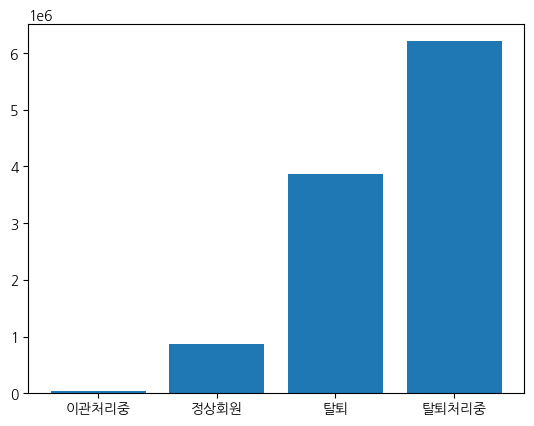

In [81]:
import seaborn as sns 
import matplotlib.pyplot as plt
import koreanize_matplotlib

df = df3.groupby("회원상태")["총구매금액"].mean().reset_index()
plt.bar(df["회원상태"], df["총구매금액"])
# df에서 reset_index안한 후, plt.bar(df.index, df.values)로 해도 구할수잇음 
plt.show()

6. **1회 방문 구매 평균 및 고객 등급 분류**
    - **계산:** '총구매금액'을 '총방문횟수'로 나누어 '1회방문구매평균'을 산출
    - **분류 기준:**
        - 1회 방문 구매 평균 ≥ 10만원 → **A 등급**
        - 1회 방문 구매 평균 ≥ 5만원 → **B 등급**
        - 1회 방문 구매 평균 ≥ 2만원 → **C 등급**
        - 그 외 → **D 등급**
    - **출력:** 분류 결과를 새로운 파생변수 '고객등급'으로 추가

In [89]:
df3["1회방문구매평균"] = df3["총구매금액"] / df3["총방문횟수"]
df3["고객등급"] = "D등급" 
for i in range(len(df3)):
    if df3["1회방문구매평균"][i] >= 100000:
        df3["고객등급"][i] = "A등급"
    elif df3["1회방문구매평균"][i] >= 50000:
        df3["고객등급"][i] = "B등급"
    elif df3["1회방문구매평균"][i] >= 20000:
        df3["고객등급"][i] = "C등급" 

df3

,Unnamed: 0,회원번호,회원상태,성별,결혼유무,주소,연령,총구매금액,총구매수량,총방문횟수,연령대,1회방문구매평균,고객등급
0,0,2101,정상회원,여,기혼,서울 강북구 미아동 134-,51,1991230,382.0,86,50대,23153.837209,C등급
1,1,2102,정상회원,여,NaN,경기 용인시 수지구 동천동,71,2095860,472.5,79,70대,26529.873418,C등급
2,2,2103,정상회원,여,기혼,경기 용인시 수지구 동천동,46,8273550,1675.4,126,40대,65663.095238,B등급
3,3,2104,정상회원,여,NaN,경기 용인시 수지구 성복동,49,6289495,1401.8,125,40대,50315.960000,B등급
4,4,2105,정상회원,여,기혼,경기 용인시 수지구 동천동,70,3067930,602.0,57,70대,53823.333333,B등급
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4280,4280,6492,정상회원,여,미혼,경기 성남시 분당구 판교동,55,51550,10.0,1,50대,51550.000000,B등급
4281,4281,6493,정상회원,여,기혼,서울 관악구 행운동 1681,36,22500,3.0,1,30대,22500.000000,C등급
4282,4282,6494,정상회원,남,기혼,경기 성남시 분당구 백현동,43,18500,3.0,1,40대,18500.000000,D등급
4283,4283,6495,정상회원,여,기혼,서울 용산구 한남동 737-,57,5300,1.0,1,50대,5300.000000,D등급


7. **기혼자가 가장 많은 고객 등급 확인**
    - **목표:** 새로 생성된 '고객등급' 변수에서, 기혼 고객의 수가 가장 많은 등급을 파악

In [105]:
df3[df3["결혼유무"] == "기혼"].groupby("고객등급")["고객등급"].count().sort_values(ascending=False).idxmax()
# df3[df3["결혼유무"] == "기혼"].groupby("고객등급").size().sort_values~~~  하면 됨.    즉  ["고객등급"].count()   대신 size()로 

'C등급'

8. **지역 파생변수 생성 (주소 기반 시 분류)**
    - **목표:** `df2`의 '주소' 데이터를 활용하여 "지역(시)"라는 새로운 파생변수를 생성
    - **분류 기준:**
        - **서울시, 용인시, 성남시, 수원시, 광주시:** 해당 시명을 그대로 사용
        - **나머지 지역:** "기타"로 분류

In [108]:
df3["주소"]

0       서울 강북구 미아동 134-
1        경기 용인시 수지구 동천동
2        경기 용인시 수지구 동천동
3        경기 용인시 수지구 성복동
4        경기 용인시 수지구 동천동
             ...       
4280     경기 성남시 분당구 판교동
4281    서울 관악구 행운동 1681
4282     경기 성남시 분당구 백현동
4283    서울 용산구 한남동 737-
4284     경기 수원시 영통구 이의동
Name: 주소, Length: 4285, dtype: object

In [112]:
df3["지역(시)"] = "기타"
target = ["서울", "용인시", "성남시", "수원시", "광주시"]

for i in range(len(df3)):
    for city in target:
        if city in df3["주소"][i]:
            df3.loc[i, "지역(시)"] = "서울시" if city == "서울" else city
            break

df3

,Unnamed: 0,회원번호,회원상태,성별,결혼유무,주소,연령,총구매금액,총구매수량,총방문횟수,연령대,1회방문구매평균,고객등급,지역(시)
0,0,2101,정상회원,여,기혼,서울 강북구 미아동 134-,51,1991230,382.0,86,50대,23153.837209,C등급,서울시
1,1,2102,정상회원,여,NaN,경기 용인시 수지구 동천동,71,2095860,472.5,79,70대,26529.873418,C등급,용인시
2,2,2103,정상회원,여,기혼,경기 용인시 수지구 동천동,46,8273550,1675.4,126,40대,65663.095238,B등급,용인시
3,3,2104,정상회원,여,NaN,경기 용인시 수지구 성복동,49,6289495,1401.8,125,40대,50315.960000,B등급,용인시
4,4,2105,정상회원,여,기혼,경기 용인시 수지구 동천동,70,3067930,602.0,57,70대,53823.333333,B등급,용인시
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4280,4280,6492,정상회원,여,미혼,경기 성남시 분당구 판교동,55,51550,10.0,1,50대,51550.000000,B등급,성남시
4281,4281,6493,정상회원,여,기혼,서울 관악구 행운동 1681,36,22500,3.0,1,30대,22500.000000,C등급,서울시
4282,4282,6494,정상회원,남,기혼,경기 성남시 분당구 백현동,43,18500,3.0,1,40대,18500.000000,D등급,성남시
4283,4283,6495,정상회원,여,기혼,서울 용산구 한남동 737-,57,5300,1.0,1,50대,5300.000000,D등급,서울시


9. **고객 등급별 성별 총구매금액 기술통계량 저장 프로그램**
    - **목표:**
        - 사용자로부터 특정 '고객등급'을 입력받아 해당 등급 내 '성별'에 따른 '총구매금액'의 기술통계량(평균, 표준편차 등)을 계산
        - 계산 결과를 `result9_등급명.xlsx` (여기서 "등급명"은 입력한 고객 등급) 파일로 저장

In [115]:
a = input("고객등급: ")
result = df3[df3["고객등급"] == a].groupby("성별")["총구매금액"].describe()
result.to_excel(f"result9_{a}.xlsx")

고객등급:  A등급
